In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import anndata as ad
import numpy as np   

/Users/yijwang-admin/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1. Read in data

In [2]:
# Blood ROSMAP
ROSMAPFrame = pd.read_csv("../../../Data/ROSMAP_blood_gene_expression_monocyte_ACTL_04172023.csv",header=0, index_col=0)
ROSMAPSampleID = list(ROSMAPFrame.columns.values)
ROSMAPGeneID = list(ROSMAPFrame.index.values)

# Blood ANMerge
ANMergeFrame = pd.read_csv("../../../Data/ANMerge_blood_rna_gene_expr_processed_XH_10112023.csv",header=0, index_col=0)
ANMergeGeneID = list(ANMergeFrame.index.values)
ANMergeSampleID = list(ANMergeFrame.columns.values)

In [3]:
# log transform ROSMAP
ROSMAPFrame = np.log(ROSMAPFrame+1)

# gene overlap between ROSMAP and ANMerge
OverlapGene = list(set(ROSMAPGeneID) & set(ANMergeGeneID))
print("Number of overlapped gene is", len(OverlapGene))

Number of overlapped gene is 2785


In [4]:
ROSMAPFrame = ROSMAPFrame.loc[OverlapGene,:]
ANMergeFrame = ANMergeFrame.loc[OverlapGene,:]

In [5]:
ROSMAPFrame.to_csv("./ROSMAP_blood_gene_expression_monocyte_ACTL_04172023_gene_aligned.csv")
ANMergeFrame.to_csv("./ANMerge_blood_rna_gene_expr_processed_XH_10112023_gene_aligned.csv")

## 1.1 Convert to andata

In [6]:
# read in data
with open("./ROSMAP_blood_gene_expression_monocyte_ACTL_04172023_gene_aligned.csv") as your_data:
    adata_rosmap = ad.read_csv(your_data, delimiter=',')
adata_rosmap = adata_rosmap.T
    
with open("./ANMerge_blood_rna_gene_expr_processed_XH_10112023_gene_aligned.csv") as your_data:
    adata_adni = ad.read_csv(your_data, delimiter=',')
adata_adni = adata_adni.T
    
# read in label
Blood_Info = pd.read_csv("../../../Data/ROSMAP_blood_clinical_monocyte_ACTL_04172023.csv",header=0, index_col=0)

# read in label
Blood_Adni_Info = pd.read_csv("../../../Data/ANMerge_blood_rna_clinical_processed_XH_10112023.csv",header=0, index_col=0)
    

In [7]:
adata_adni.obs

""
DCR00001_1
DCR00004_1
DCR00009_1
DCR00013_1
DCR00014_1
...
TLSMCI607_1
TLSMCI608_1
TLSMCI609_1
TLSMCI611_1


In [8]:
Blood_Adni_Info

,Visit,Month,Site,Diagnosis,Sex,Age,APOE,MMSE,Gexp_batch
DCR00001_1,1,0,DCR,AD,Female,80.0,E3E4,21.0,2
DCR00004_1,1,0,DCR,MCI,Male,78.0,E4E4,27.0,2
DCR00009_1,1,0,DCR,CTL,Female,69.0,E3E3,30.0,2
DCR00013_1,1,0,DCR,CTL,Male,82.0,E3E3,30.0,2
DCR00014_1,1,0,DCR,CTL,Female,75.0,E2E3,30.0,2
...,...,...,...,...,...,...,...,...,...
TLSMCI607_1,1,0,Toulouse,MCI,Female,72.0,E3E3,29.0,1
TLSMCI608_1,1,0,Toulouse,MCI,Male,73.0,E3E3,28.0,1
TLSMCI609_1,1,0,Toulouse,MCI,Female,63.0,E3E3,28.0,2
TLSMCI611_1,1,0,Toulouse,MCI,Female,78.0,E3E3,30.0,2


In [9]:
import collections
# For rosmap blood
Blood_ROSMAP_Info = Blood_Info
BloodSampleID_Rosmap = list(adata_rosmap.obs.index)

SID = list(Blood_ROSMAP_Info.specimenID)
ADType = list(Blood_ROSMAP_Info.Group1)
Mapping = {'Control': 0, 'Typical AD': 1, 'Asym AD': 2, 'Low-NFT AD': 3}
frequency_rosmap = collections.Counter(ADType)
print(dict(frequency_rosmap))

Rosmap_Sample_CN = list()
Rosmap_Sample_TAD = list()
Rosmap_Sample_AAD = list()
for i in range(len(SID)):
    if ADType[i] == 'Control':
        Rosmap_Sample_CN.append(SID[i])
    if ADType[i] == 'Typical AD' or ADType[i] == 'Low-NFT AD':
        Rosmap_Sample_TAD.append(SID[i])
    if ADType[i] == 'Asym AD':
        Rosmap_Sample_AAD.append(SID[i])
#print(Rosmap_Sample_CN)
#print(Rosmap_Sample_TAD)
#print(Rosmap_Sample_AAD)

SType_Blood_Rosmap = list()
for i in range(len(BloodSampleID_Rosmap)):
    if BloodSampleID_Rosmap[i] in SID:
        indt = SID.index(BloodSampleID_Rosmap[i])
        tmp = Mapping[ADType[indt]]
        SType_Blood_Rosmap.append(tmp)
print(SType_Blood_Rosmap)
print(len(SType_Blood_Rosmap))

{'Typical AD': 46, 'Asym AD': 88, 'Control': 18, 'Low-NFT AD': 5}
[1, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 0, 2, 3, 2, 1, 0, 2, 2, 3, 1, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 3, 1, 2, 2, 2, 3, 2, 2]
157


In [10]:
Adni_SID = list(Blood_Adni_Info.index.values)
Adni_Type = list(Blood_Adni_Info.Diagnosis)

SID_data = list(adata_adni.obs.index)

Adni_Type_Data = list()
for i in range(len(SID_data)):
    if SID_data[i] in Adni_SID:
        indt = Adni_SID.index(SID_data[i])
        tmp = Adni_Type[indt]
        Adni_Type_Data.append(tmp)
print(Adni_Type_Data)

['AD', 'MCI', 'CTL', 'CTL', 'CTL', 'CTL', 'CTL', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'MCI', 'CTL', 'AD', 'CTL', 'CTL', 'CTL', 'AD', 'CTL', 'CTL', 'CTL', 'AD', 'CTL', 'CTL', 'CTL', 'AD', 'CTL', 'AD', 'CTL', 'CTL', 'MCI', 'CTL', 'CTL', 'CTL', 'AD', 'CTL', 'CTL', 'CTL', 'AD', 'MCI', 'AD', 'CTL', 'CTL', 'CTL', 'AD', 'AD', 'MCI', 'AD', 'CTL', 'CTL', 'CTL', 'CTL', 'AD', 'CTL', 'AD', 'MCI', 'CTL', 'AD', 'CTL', 'MCI', 'CTL', 'MCI', 'CTL', 'CTL', 'CTL', 'CTL', 'CTL', 'MCI', 'AD', 'CTL', 'CTL', 'CTL', 'MCI', 'CTL', 'CTL', 'CTL', 'MCI', 'CTL', 'CTL', 'CTL', 'CTL', 'AD', 'CTL', 'CTL', 'AD', 'CTL', 'CTL', 'CTL', 'CTL', 'AD', 'CTL', 'AD', 'AD', 'MCI', 'AD', 'CTL', 'MCI', 'CTL', 'MCI', 'MCI', 'MCI', 'MCI', 'MCI', 'MCI', 'MCI', 'MCI', 'MCI', 'MCI', 'CTL', 'MCI', 'MCI', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'A

In [11]:
adata_adni

AnnData object with n_obs × n_vars = 691 × 2785

In [12]:
adata_rosmap.obs["RosmapLabel"] = list(Blood_Info.Group1)

In [13]:
sc.pp.log1p(adata_rosmap)
sc.pp.pca(adata_rosmap)
sc.pp.neighbors(adata_rosmap)
sc.tl.umap(adata_rosmap)

/Users/yijwang-admin/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


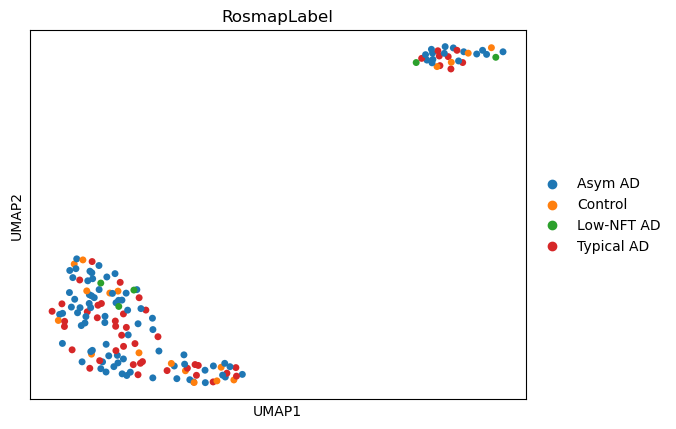

In [14]:
sc.pl.umap(adata_rosmap, color='RosmapLabel', size=100)



In [15]:
adata_adni.obs["AdniLabel"] =Adni_Type_Data

sc.pp.pca(adata_adni)
sc.pp.neighbors(adata_adni)
sc.tl.umap(adata_adni)

/Users/yijwang-admin/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


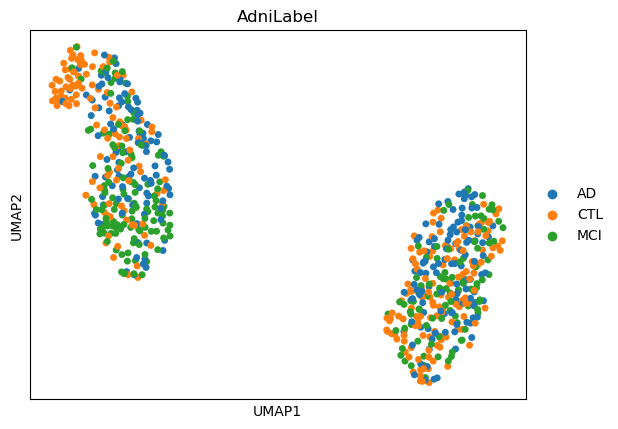

In [16]:
sc.pl.umap(adata_adni, color = 'AdniLabel', size=100)

In [17]:
adata_concat_raw = adata_rosmap.concatenate(adata_adni, batch_categories=['rosmap', 'adni'])

/Users/yijwang-admin/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


/Users/yijwang-admin/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


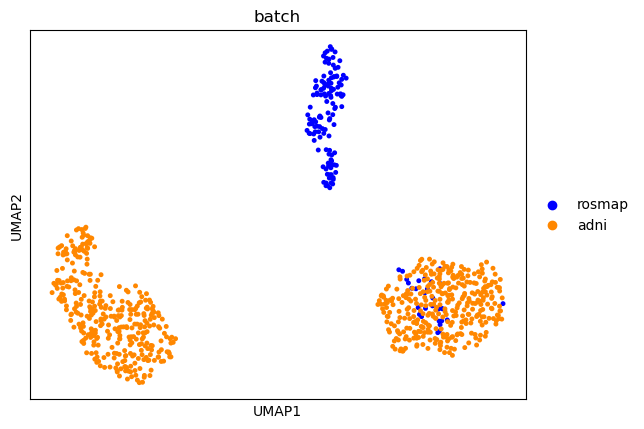

In [18]:

sc.pp.neighbors(adata_concat_raw)
sc.tl.umap(adata_concat_raw)
sc.pl.umap(adata_concat_raw, color=['batch'], palette={'rosmap':'blue', 'adni':(1,135/255.,0)}, size=50, save="raw_rosmpa_adni.svg")



# 2. Integrate by ingest

In [19]:
sc.tl.ingest(adata_adni, adata_rosmap, obs='RosmapLabel')

In [20]:
adata_adni.uns["RosmapLabel_colors"]=adata_rosmap.uns["RosmapLabel_colors"]

/Users/yijwang-admin/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


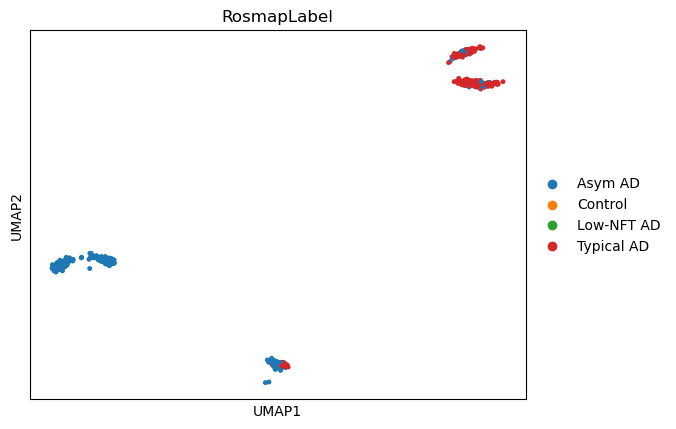

In [21]:
sc.pl.umap(adata_adni, color=['RosmapLabel'], size=50)


In [22]:
adata_concat = adata_rosmap.concatenate(adata_adni, batch_categories=['rosmap', 'adni'])

/Users/yijwang-admin/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


In [23]:
adata_concat.obs.RosmapLabel = adata_concat.obs.RosmapLabel.astype('category')
adata_concat.obs.RosmapLabel.cat.reorder_categories(adata_rosmap.obs.RosmapLabel.cat.categories, inplace=True)  # fix category ordering
adata_concat.uns['RosmapLabel_colors'] = adata_rosmap.uns['RosmapLabel_colors']  # fix category colors



/var/folders/x5/p97rd26d6y719tstlhqtn9zr0000gr/T/ipykernel_2505/4279331658.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata_concat.obs.RosmapLabel.cat.reorder_categories(adata_rosmap.obs.RosmapLabel.cat.categories, inplace=True)  # fix category ordering


/Users/yijwang-admin/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


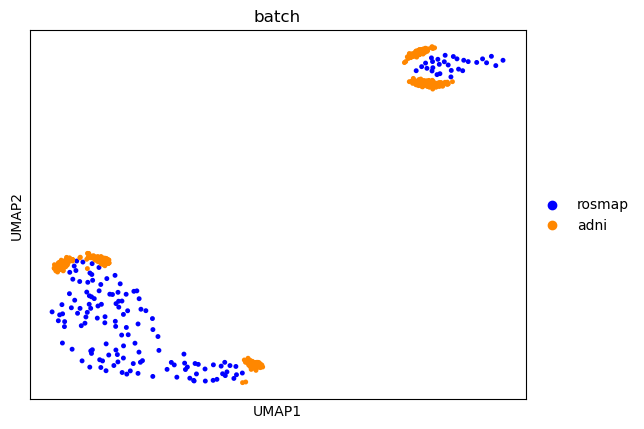

In [24]:

sc.pl.umap(adata_concat, color=['batch'], palette={'rosmap':'blue', 'adni':(1,135/255.,0)}, size=50, save="ingest_rosmpa_adni.svg")

In [25]:
import numpy as np
y_pred_lb = list(adata_adni.obs['RosmapLabel'])
Mapping = {'Control': 0, 'Typical AD': 1, 'Asym AD': 2, 'Low-NFT AD': 3}
y_pred = np.zeros(len(y_pred_lb))
for i in range(len(y_pred_lb)):
    y_pred[i] = Mapping[y_pred_lb[i]]

In [26]:
Mapping = {'CTL': 0, 'AD': 1, 'MCI': 2}
y_true_lb = Adni_Type_Data
y_true = np.zeros(len(y_true_lb))
for i in range(len(y_true_lb)):
    y_true[i] = Mapping[y_true_lb[i]]

In [27]:
pred_ind_cn = np.where(y_pred==0)[0]
true_ind_cn = np.where(y_true==0)[0]
overlap = list(set(pred_ind_cn) & set(true_ind_cn))
if len(pred_ind_cn) == 0:
    print("precision of CN is 0")
else:
    print("precision of CN is ", len(overlap)/len(pred_ind_cn))

pred_ind_tad = np.where(y_pred==1)[0]
true_ind_tad = np.where(y_true==1)[0]
overlap = list(set(pred_ind_tad) & set(true_ind_tad))
print("precision of TAD is ", len(overlap)/len(pred_ind_tad))

pred_ind_aad = np.where(y_pred==2)[0]
true_ind_aad = np.where(y_true==2)[0]
overlap = list(set(pred_ind_aad) & set(true_ind_aad))
print("precision of AAD is ", len(overlap)/len(pred_ind_aad))

precision of CN is 0
precision of TAD is  0.39408866995073893
precision of AAD is  0.33401639344262296


In [28]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_true, y_pred)

0.06285556392225902

In [29]:
pred_ind_cn = np.where(y_pred==0)[0]
true_ind_cn = np.where(y_true==0)[0]
overlap = list(set(pred_ind_cn) & set(true_ind_cn))
#if len(pred_ind_cn) == 0:
#    print("precision of CN is 0")
#else:
#    print("precision of CN is ", len(overlap)/len(pred_ind_cn))


pred_ind_aad = np.where(y_pred==2)[0]
true_ind_aad = np.where(y_true==2)[0]
overlap = list(set(pred_ind_aad) & set(true_ind_aad))
#print("precision of AAD is ", len(overlap)/len(pred_ind_aad))

pred_ind_tad = np.where(y_pred==1)[0]
true_ind_tad = np.where(y_true==1)[0]
true_ind_tad_aad = list(true_ind_aad) + list(true_ind_tad)
overlap = list(set(pred_ind_tad) & set(true_ind_tad_aad))
print("precision of TAD is ", len(overlap)/len(pred_ind_tad))

pred_ind_aad_cn = list(pred_ind_aad) #+ list(pred_ind_cn)
true_ind_aad_cn = list(true_ind_cn) + list(true_ind_aad)
overlap = list(set(pred_ind_aad_cn) & set(true_ind_aad_cn))
print("precision of AAD  is ", len(overlap)/len(pred_ind_aad_cn))

pred_ind_aad_cn = list(pred_ind_cn) #list(pred_ind_aad) + 
true_ind_aad_cn = list(true_ind_cn) + list(true_ind_aad)
overlap = list(set(pred_ind_aad_cn) & set(true_ind_aad_cn))
if len(pred_ind_aad_cn) == 0:
    print("precision of CN  is 0")
else:
    print("precision of CN  is ", len(overlap)/len(pred_ind_aad_cn))

pred_ind_lt = np.where(y_pred==3)[0]
true_ind_lt = np.where(y_true==1)[0]
true_ind_lt_aad = list(true_ind_aad) + list(true_ind_lt)
overlap = list(set(pred_ind_lt) & set(true_ind_lt_aad))
if len(pred_ind_lt) == 0:
    print("precision of LowTau is 0")
else:
    print("precision of LowTau is ", len(overlap)/len(pred_ind_lt))

precision of TAD is  0.6699507389162561
precision of AAD  is  0.7069672131147541
precision of CN  is 0
precision of LowTau is 0
